# ADS 505 Final Project

## Best Home Regions

### Claire Bentzen, Jiaqi He, Sultan Mahmud Rahat

## Introduction
**GitHub Link: https://github.com/clairebentzen/best_home_regions**

Investing in real estate properties is a known method for generating wealth and passive income. Making well-informed decisions is based on how profitable a property might be. To determine profitability, factors such as mortgage rates, rent ratios, and location are used. CKM Real Estate LLC is interested in determining what areas of the United States provide the best opportunities for investments. In addition to geographical regions of best investment, when CKM Real Estate is presented with a list of new potential properties they are interested in knowing which properties are the best investments.

In [2]:
# import packages

# basics and visuals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import tk

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [3]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read in data
homes = pd.read_csv('final_dataset.csv')
homes.head()

,MortgageRateConventionalFixed_2011-06,MortgageRateConventionalFixed_2011-07,MortgageRateConventionalFixed_2011-08,MortgageRateConventionalFixed_2011-09,MortgageRateConventionalFixed_2011-10,MortgageRateConventionalFixed_2011-11,MortgageRateConventionalFixed_2011-12,MortgageRateConventionalFixed_2012-01,MortgageRateConventionalFixed_2012-02,MortgageRateConventionalFixed_2012-03,...,PriceToRentRatio_2017-08,PriceToRentRatio_2017-09,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,New_Composite_Score
0,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,10.64,10.72,58196,1001,Agawam,MA,Springfield,Hampden,5770,0.243539
1,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,12.94,13.15,58197,1002,Amherst,MA,Springfield,Hampshire,4112,0.317422
2,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,11.36,11.50,58200,1005,Town of Barre,MA,Worcester,Worcester,11428,0.267254
3,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,12.94,12.77,58201,1007,Town of Belchertown,MA,Springfield,Hampshire,6855,0.305868
4,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,11.98,11.97,58202,1008,Blandford,MA,Springfield,Hampden,15088,0.281545


In [5]:
# identify number of rows and columns
homes.shape

(14233, 168)

This dataset contains 14,233 rows and 168 columns. 

- 76 of the columns are fixed mortgage rates from June 2011 to September 2017
- 84 of them are price-to-rent ratios from October 2010 to September 2017 
- 6 relate to the location
- 1 has to do with the size ranking
- 1 is the composite score that is used to determine investment viability

## Data Preprocessing

#### Remove Columns used for Composite Score column

In [6]:
# drop most recent mortgage and price to rent columns
homes.drop(columns=['PriceToRentRatio_2017-09', 'MortgageRateConventionalFixed_2017-09'], inplace=True)

These two columns are removed because they are directly used to compute the composite score and we want to avoid data leakage.

#### Check for Duplicate Records

In [7]:
# check for duplicates
duplicate_homes = homes[homes.duplicated()]
duplicate_homes.shape

(0, 166)

There are no duplicate records in the dataset.

#### Check for Missing Values

In [8]:
# check for overall percentage of missing values
missing_values = homes.isnull().sum().sum()
percent_missing = (missing_values / homes.size) * 100
print("Total percentage of missing data: {:.2f}%".format(percent_missing))

Total percentage of missing data: 1.65%


In [9]:
pd.set_option('display.max_rows', None)

# check which columns missing values reside in
missing_homes = homes.isnull().sum()
columns_missing_values = missing_homes[missing_homes > 0]

# turn missing values series into dataframe
columns_missing_values_df = columns_missing_values.to_frame()
columns_missing_values_df.columns = ['Count']

In [10]:
# missing values as percentages
columns_missing_values_percents = (columns_missing_values / homes.size) * 100

# turn missing values percentage series into dataframe
columns_missing_values_percents_df = columns_missing_values_percents.to_frame()
columns_missing_values_percents_df.columns = ['%']

In [11]:
# merge dataframes to display counts against percentages
missing = columns_missing_values_df.join(columns_missing_values_percents_df, how='inner')
print(missing.sort_values(by=['Count'], ascending=False))

                          Count         %
PriceToRentRatio_2010-11   1184  0.050113
PriceToRentRatio_2010-10    994  0.042071
PriceToRentRatio_2010-12    906  0.038346
PriceToRentRatio_2011-03    724  0.030643
PriceToRentRatio_2012-08    701  0.029670
PriceToRentRatio_2011-06    693  0.029331
PriceToRentRatio_2011-01    691  0.029246
PriceToRentRatio_2011-12    683  0.028908
PriceToRentRatio_2012-06    679  0.028739
PriceToRentRatio_2012-10    670  0.028358
PriceToRentRatio_2012-07    664  0.028104
PriceToRentRatio_2011-02    651  0.027553
PriceToRentRatio_2011-11    645  0.027300
PriceToRentRatio_2011-05    644  0.027257
PriceToRentRatio_2013-03    641  0.027130
PriceToRentRatio_2012-09    636  0.026919
PriceToRentRatio_2011-04    635  0.026876
PriceToRentRatio_2012-01    633  0.026792
PriceToRentRatio_2011-07    632  0.026749
PriceToRentRatio_2012-05    632  0.026749
PriceToRentRatio_2013-01    628  0.026580
PriceToRentRatio_2012-12    619  0.026199
PriceToRentRatio_2012-04    617  0

This dataframe shows the rows with missing values including the counts and percentage of missing values. It is notable that all the columns with any missing values are PriceToRentRatio columns.

The top 5 columns with missing values are:
- PriceToRentRatio_2010-11
- PriceToRentRatio_2010-10
- PriceToRentRatio_2010-12
- PriceToRentRatio_2011-03
- PriceToRentRatio_2012-08

In [12]:
# drop missing values in the dataset
homes = homes.dropna()
homes.shape

(12786, 166)

Although missing values only made up 1.65% of the overall dataset, we have dropped rows that contained missing values which brought the dataset to have 12,786 remaining records.

#### Select and Normalize Data

In [56]:
# convert categorical columns to type column
categorical = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName']
homes[categorical] = homes[categorical].astype('category')

In [57]:
# select feature and target columns
numerical_columns = [col for col in homes.columns if col not in categorical]
X = homes.drop(columns='New_Composite_Score')

y = homes['New_Composite_Score'].values.reshape(-1, 1)

In [58]:
# scale columns using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# apply MinMaxScaler to X and y
X_scaled = homes.copy()
X_scaled[numerical_columns] = scaler_X.fit_transform(X_scaled[numerical_columns])
y_scaled = scaler_y.fit_transform(y)

In [59]:
# drop all the mortgage columns since they are fixed and scale to 0
X_scaled = X_scaled.iloc[:, 75:]

In [60]:
# one-hot encode categorical variable
X_scaled = pd.get_dummies(X_scaled, columns=categorical)

Normalizing the numerical columns will ensure that everything is on the same scale.

#### Principal Component Analysis

In [61]:
pca = PCA(n_components = 8)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(12786, 8)

Due to the high dimensionality of this dataset, principal component analysis is performed to reduce the dimensions so that it is more efficient when fitting models. We end up with only 8 columns for X.

#### Split into Train, Validation, and Test Sets

In [62]:
# split data
X_temp, X_test, y_temp, y_test = train_test_split(X_pca, y_scaled, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

The data is split in the following manner:
- 40% train
- 30% validation
- 30% test

## Exploratory Data Analysis

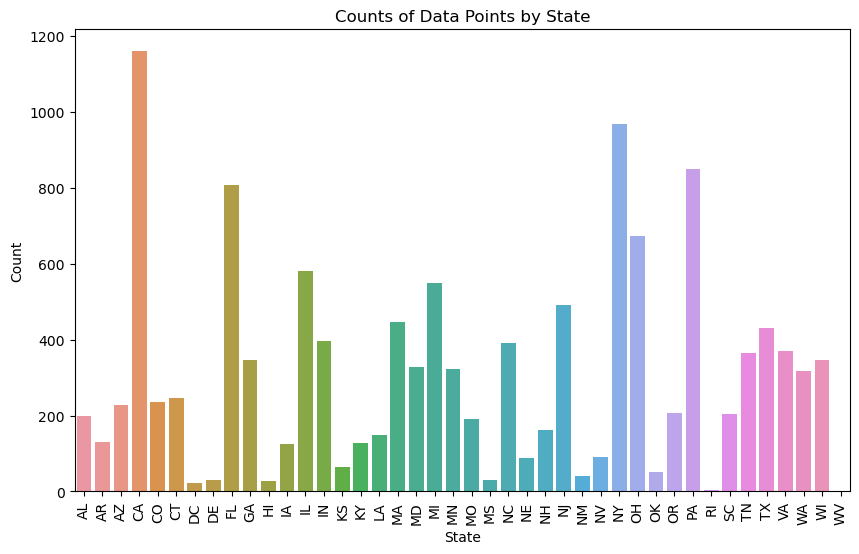

In [63]:
# Count plots to visualize category counts.
plt.figure(figsize=(10, 6))
sns.countplot(data=homes, x='State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Counts of Data Points by State')
plt.xticks(rotation=90)
plt.show()

This graph portrays the distribution of properties by state. The states with the most properties in this dataset are as follows:
- California
- New York
- Pennsylvania
- Florida
- Illinois

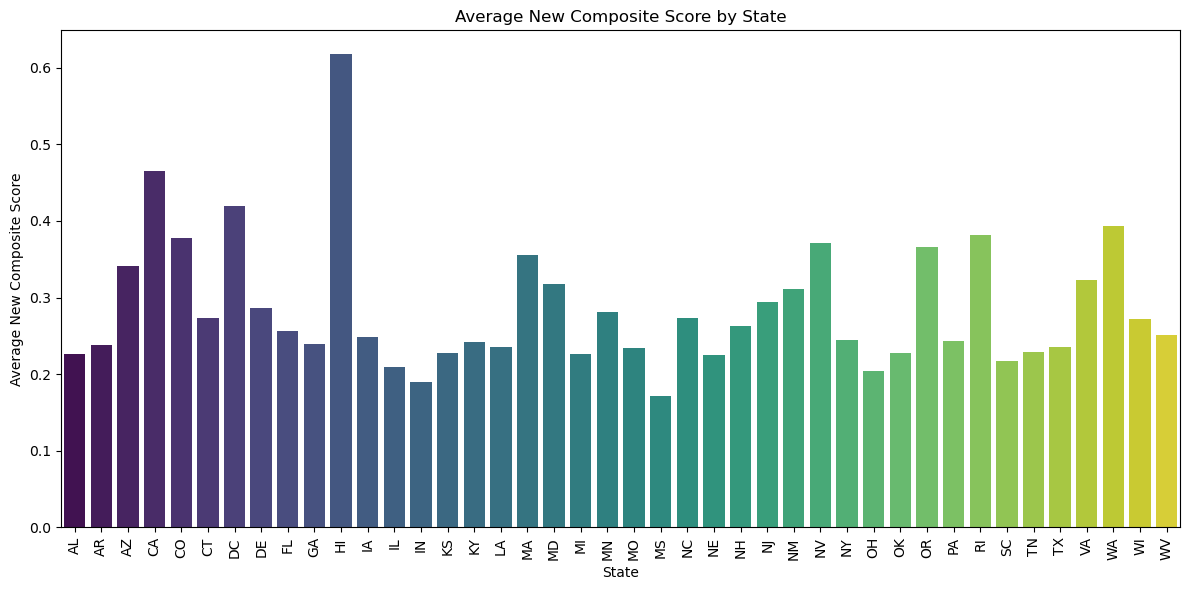

In [64]:
# New_Composite_Score for each state
plt.figure(figsize=(12, 6))
sns.barplot(data=homes, x='State', y='New_Composite_Score', ci=None, palette='viridis')
plt.xlabel('State')
plt.ylabel('Average New Composite Score')
plt.title('Average New Composite Score by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

This graph shows the average composite score for each state (including Washington DC). The states with the highest composite scores are as follows:
- Hawaii
- California
- Washington DC
- Washington
- Rhode Island

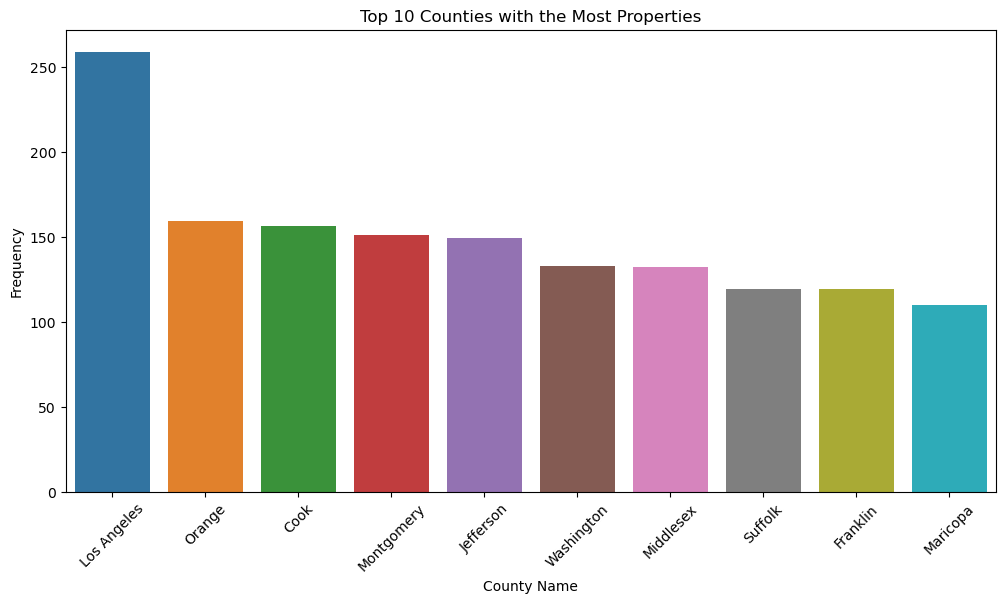

In [65]:
# Top 10 Counties by Frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=homes, x='CountyName', order=homes['CountyName'].value_counts().index[:10])
plt.xlabel('County Name')
plt.ylabel('Frequency')
plt.title('Top 10 Counties with the Most Properties')
plt.xticks(rotation=45)
plt.show()

This graph looks at the frequency of properties by county. Here you can see the top 10 counties with the highest frequencies. Los Angeles county has a significantly greater amount of properties compared to other counties.

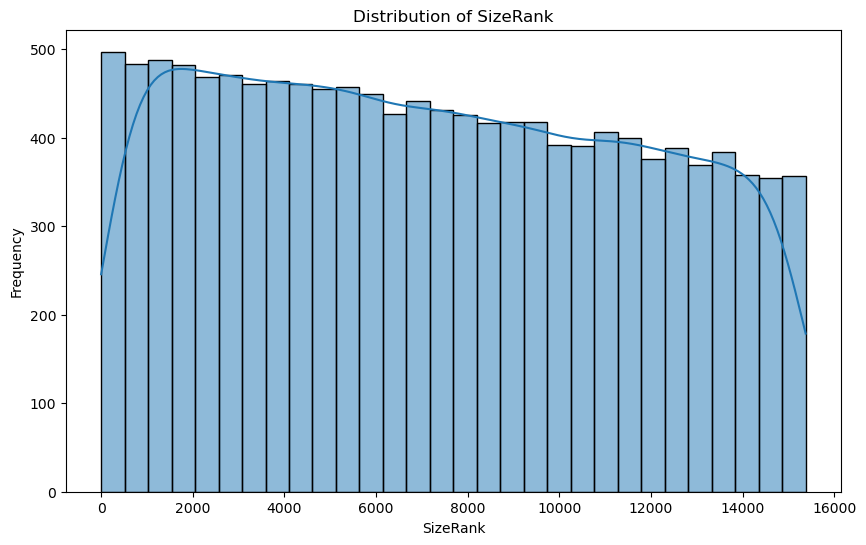

In [66]:
# distribution of size rank
plt.figure(figsize=(10, 6))
sns.histplot(data=homes, x='SizeRank', bins=30, kde=True)
plt.xlabel('SizeRank')
plt.ylabel('Frequency')
plt.title('Distribution of SizeRank')
plt.show()

SizeRank has a right skewed distribution.

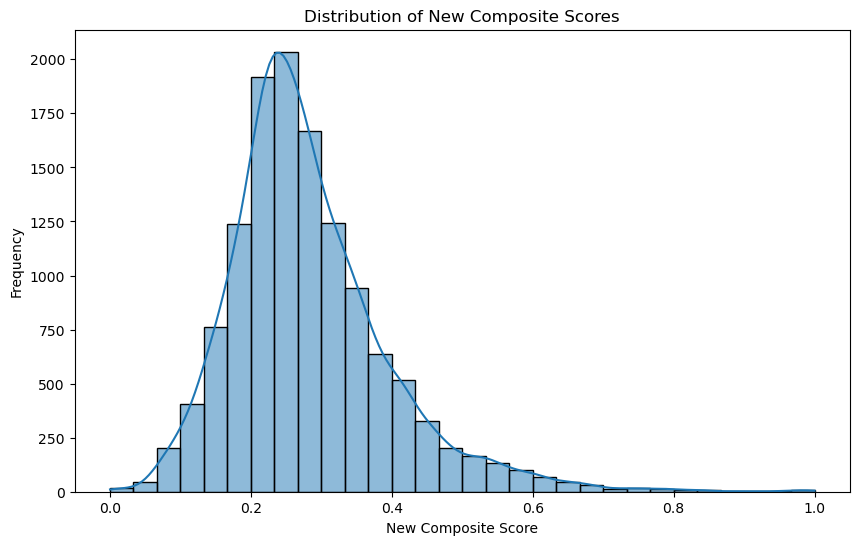

In [67]:
# Distribution of new composite scores
plt.figure(figsize=(10, 6))
sns.histplot(data=homes, x='New_Composite_Score', bins=30, kde=True)
plt.xlabel('New Composite Score')
plt.ylabel('Frequency')
plt.title('Distribution of New Composite Scores')
plt.show()

The graph shows the distribution of the New Composite Score. The right-skewed distribution shows the average new composite score falls between 0.2 and 0.3

## Modeling

### Multiple Linear Regression

A multiple linear regression model is fit to the data to predict New_Composite_Score. Here we don't specify any parameters.

In [68]:
# train the model on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [69]:
# apply model to validation set
val_pred_ml = ml.predict(X_val)

In [70]:
# evaluate the model with R2 Score on validation set
r2_score(y_val, val_pred_ml)

0.9425748763970765

In [71]:
# regression summary
summary_ml = regressionSummary(y_val, val_pred_ml)
summary_ml


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0271
            Mean Absolute Error (MAE) : 0.0199
          Mean Percentage Error (MPE) : -1.6826
Mean Absolute Percentage Error (MAPE) : 8.6497


The multiple linear regression model performs well with a .943 r2-score and the above listed regression statistics.

Text(0.5, 1.0, 'Multiple Linear Regression Model - Actual vs Predicted')

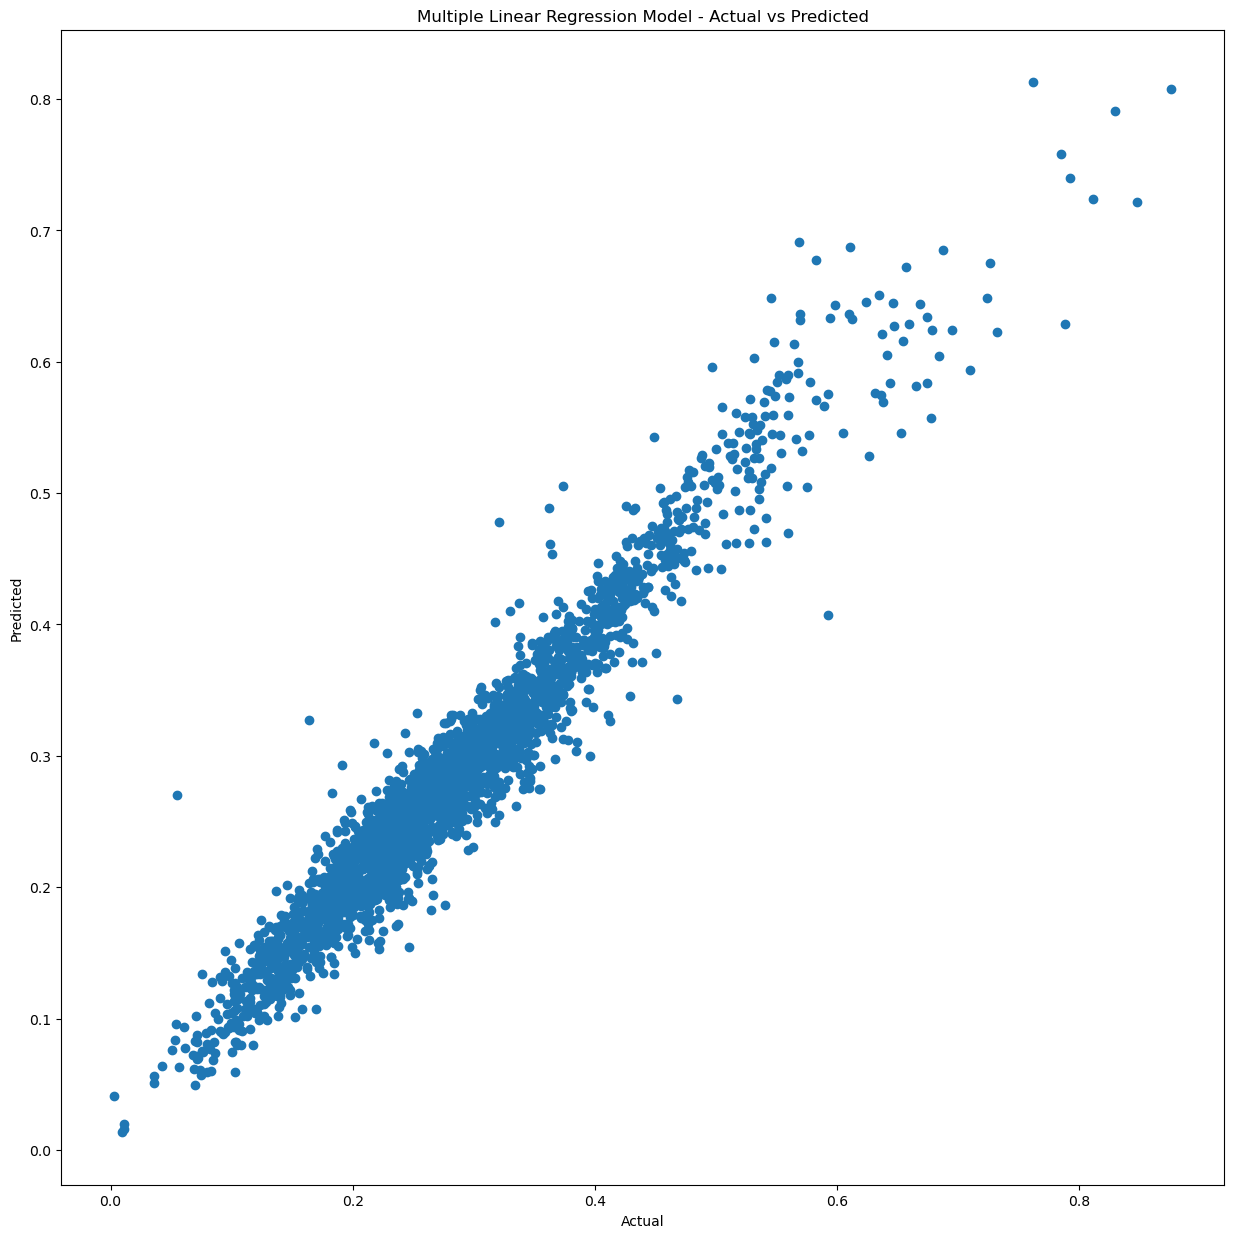

In [72]:
# plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_val, val_pred_ml)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression Model - Actual vs Predicted')

In [73]:
# predicted values
pred_val_df = pd.DataFrame({'Actual Value': y_val.ravel(), 'Predicted Value': val_pred_ml.ravel(), 'Residual':y_val.ravel()-val_pred_ml.ravel()})
display(pred_val_df.head())

,Actual Value,Predicted Value,Residual
0,0.192460,0.250836,-0.058376
1,0.164792,0.177689,-0.012897
2,0.220736,0.198883,0.021853
3,0.269383,0.305056,-0.035673
4,0.134387,0.129564,0.004824


### Random Forest

A random forest regression model is fit to the data to predict New_Composite_Score. Here we specify n_estimators = 500 and set a random state.

In [74]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 10)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=10)

In [75]:
# apply model to validation set
val_pred_rf = rf.predict(X_val)

In [76]:
# evaluate the model with R2 Score on validation set
r2_score(y_val, val_pred_rf)

0.9611490897924524

In [77]:
# regression summary
summary_rf = regressionSummary(y_val, val_pred_rf)
summary_rf


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0223
            Mean Absolute Error (MAE) : 0.0156
          Mean Percentage Error (MPE) : -1.4336
Mean Absolute Percentage Error (MAPE) : 6.8222


The random forest model performs very well with a .961 r2-score and the above listed regression statistics.

Text(0.5, 1.0, 'Random Forest Model - Actual vs Predicted')

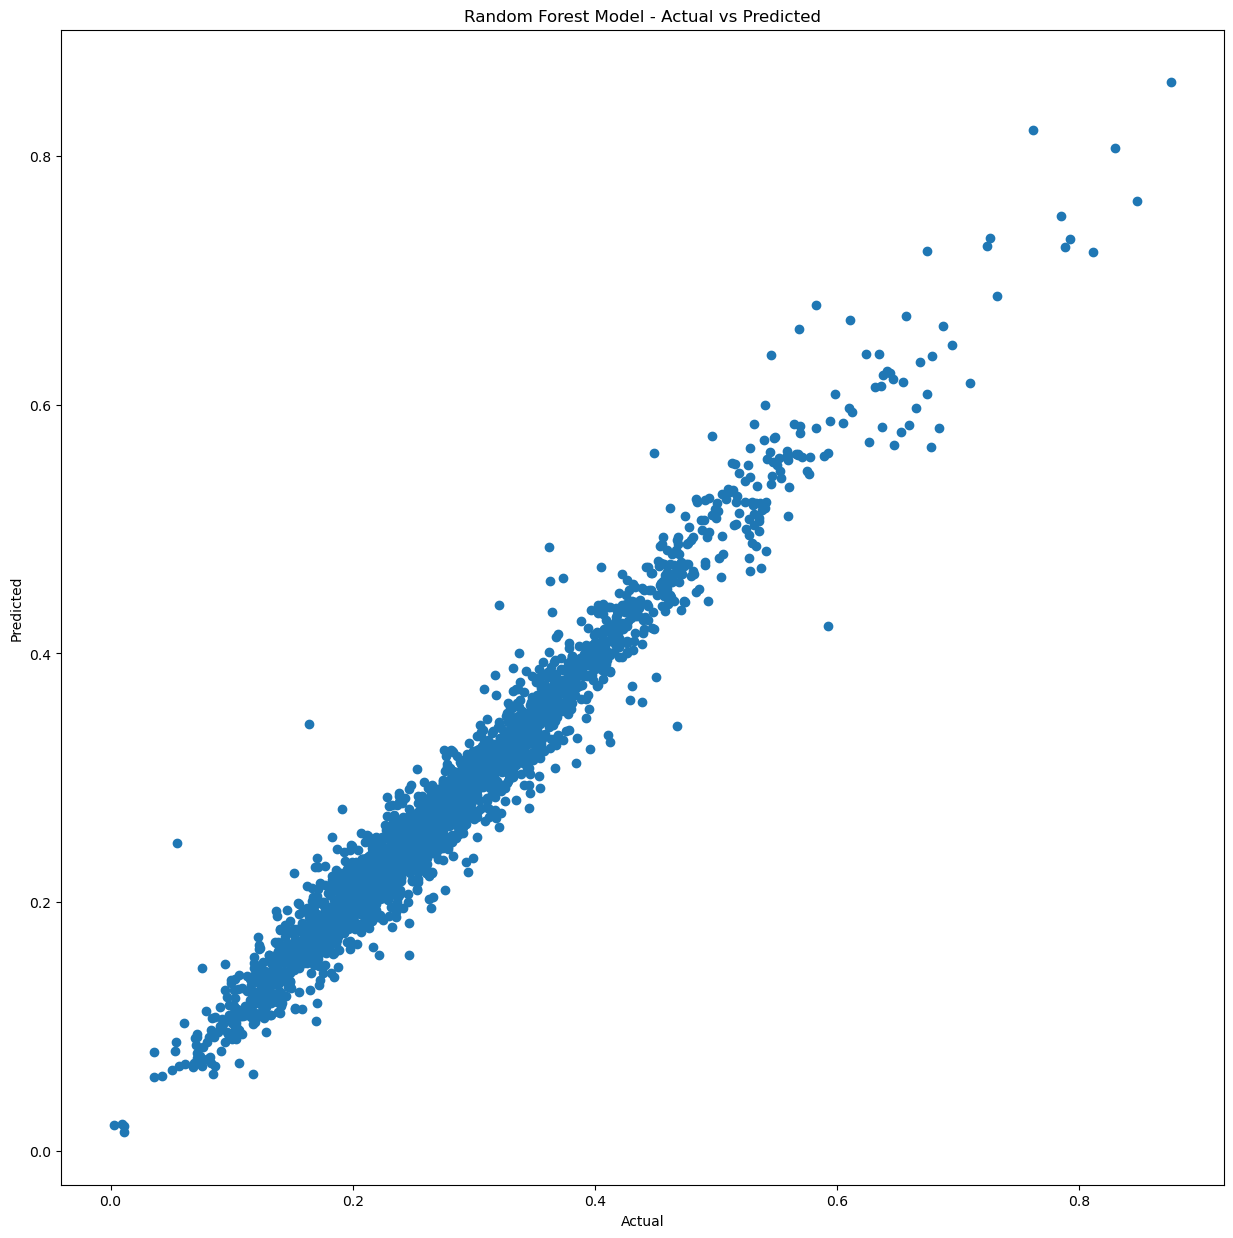

In [78]:
# plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_val, val_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model - Actual vs Predicted')

In [79]:
# predicted values
pred_val_df = pd.DataFrame({'Actual Value': y_val.ravel(), 'Predicted Value': val_pred_rf.ravel(), 'Residual':y_val.ravel()-val_pred_rf.ravel()})
display(pred_val_df.head())

,Actual Value,Predicted Value,Residual
0,0.192460,0.240587,-0.048127
1,0.164792,0.169291,-0.004499
2,0.220736,0.218957,0.001779
3,0.269383,0.290731,-0.021348
4,0.134387,0.126016,0.008372


### Gradient Boost

A gradient boost regression model is fit to the data to predict New_Composite_Score. Here we specify n_estimators = 100, learning_rate=0.1, math_depth=3, and set a random state.

In [80]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gb.fit(X_train, y_train.ravel())

GradientBoostingRegressor(random_state=1)

In [81]:
# apply model to validation set
val_pred_gb = gb.predict(X_val)

In [82]:
# evaluate the model with R2 Score on validation set
r2_score(y_val, val_pred_gb)

0.9575351872474076

In [83]:
# regression summary
summary_gb = regressionSummary(y_val, val_pred_gb)
summary_gb


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0233
            Mean Absolute Error (MAE) : 0.0165
          Mean Percentage Error (MPE) : -2.0136
Mean Absolute Percentage Error (MAPE) : 7.4859


The gradient boost model performs well with a .958 r2-score and the above listed regression statistics.

Text(0.5, 1.0, 'Gradient Boost Model - Actual vs Predicted')

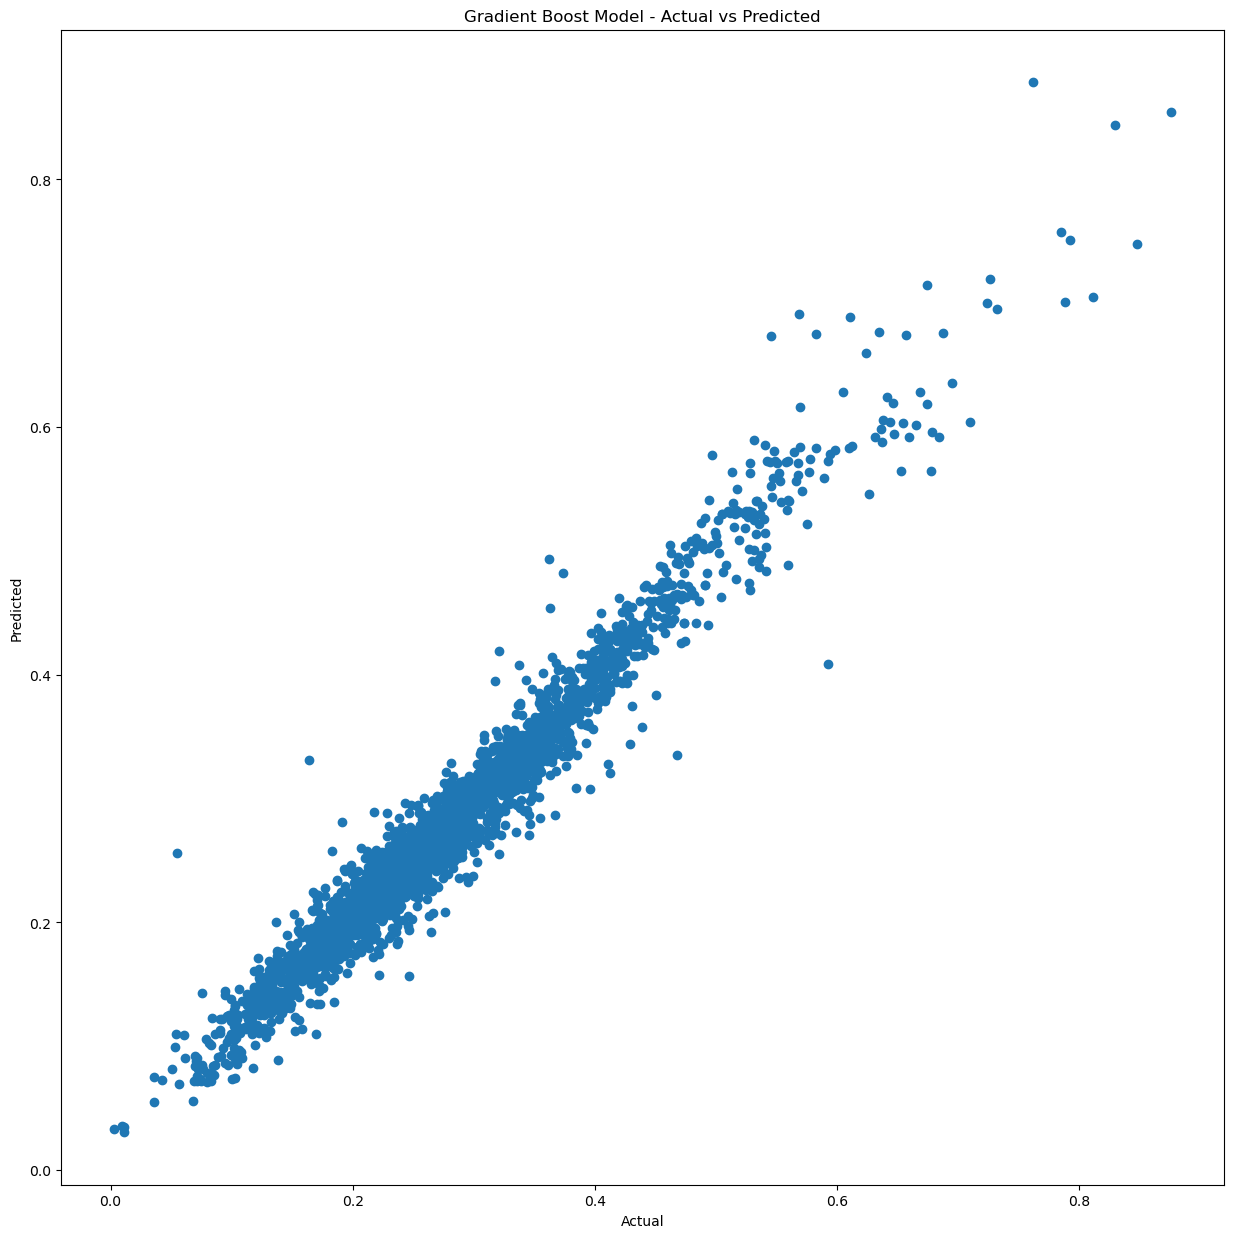

In [84]:
# plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_val, val_pred_gb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boost Model - Actual vs Predicted')

In [85]:
# predicted values
pred_val_df = pd.DataFrame({'Actual Value': y_val.ravel(), 'Predicted Value': val_pred_gb.ravel(), 'Residual':y_val.ravel()-val_pred_gb.ravel()})
display(pred_val_df.head())

,Actual Value,Predicted Value,Residual
0,0.192460,0.243235,-0.050776
1,0.164792,0.175848,-0.011057
2,0.220736,0.213620,0.007116
3,0.269383,0.298290,-0.028908
4,0.134387,0.134638,-0.000251


### Comparison

In [86]:
print('Multiple Linear Regression: ')
print(regressionSummary(y_val, val_pred_ml))

print('\nRandom Forest: ')
print(regressionSummary(y_val, val_pred_rf))

print('\nGradient Boost: ')
print(regressionSummary(y_val, val_pred_gb))

Multiple Linear Regression: 

Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0271
            Mean Absolute Error (MAE) : 0.0199
          Mean Percentage Error (MPE) : -1.6826
Mean Absolute Percentage Error (MAPE) : 8.6497
None

Random Forest: 

Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0223
            Mean Absolute Error (MAE) : 0.0156
          Mean Percentage Error (MPE) : -1.4336
Mean Absolute Percentage Error (MAPE) : 6.8222
None

Gradient Boost: 

Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0233
            Mean Absolute Error (MAE) : 0.0165
          Mean Percentage Error (MPE) : -2.0136
Mean Absolute Percentage Error (MAPE) : 7.4859
None


The initial comparison of the models is with the r2-score. The model with the best r2-score is the random forest model, but the other two models are not far behind. In addition, the random forest model also has the smallest mean absolute percentage error, mean percentage error, and mean absolute error. Due to these observations, the random forest model is selected as the optimal model and will be used to predict the New_Composite_Score of new properties.

## Application

In [87]:
# apply random forest model to test set
test_pred_rf = rf.predict(X_test)

In [88]:
test_pred_rf = pd.DataFrame({'Predicted_Value': val_pred_ml.ravel()})
test_pred_rf.sort_values(by='Predicted_Value', ascending=True)[:20]

,Predicted_Value
1413,0.013418
1308,0.016237
742,0.019400
1453,0.040826
332,0.049679
2241,0.050820
818,0.056189
243,0.056859
2408,0.058971
126,0.058976


The profitability of an investment is determined based on the composite score of a property. Using the random forest model, the composite score was predicted for the new properties. The lower the composite score, the better the investment is, so this list of 20 properties is the top 20 best properties to invest in from the new list.